# PROJECT: HEARTH ATTACK PREDICTION

# 1-Introducing about values 

## Overview

This file describes the contents of the heart-disease directory.

This directory contains 4 databases concerning heart disease diagnosis.
All attributes are numeric-valued. The data was collected from the
four following locations:

 1. Cleveland Clinic Foundation (cleveland.data)
 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
 3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
 4. University Hospital, Zurich, Switzerland (switzerland.data)


Complete attribute documentation:

1 age: age in years

2 sex: sex (1 = male; 0 = female)

3 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

4 trestbps: resting blood pressure (in mm Hg on admission to the
hospital)


5 chol: serum cholestoral in mg/dl


6 fbs: (fasting blood sugar > 120 mg/dl) (2=not measured; 1 = true; 0 = false)


7 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy
-- Value 3: not measured
by Estes' criteria

8 thalach: maximum heart rate achieved


9 exang: exercise induced angina (1 = yes; 0 = no)
-- Value 2: : for none

10 oldpeak: ST depression induced by exercise relative to rest

11 slope: the slope of the peak exercise ST segment
-- Value 0:for none
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

12 ca: number of major vessels (0-3) colored by flourosopy 
  

13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
-- Value 0: for none

14 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing



## Questions

1. What is the rate of people over 40 years old and people under 40 with cholesterol over 300 to all?
2. What is the rate of people have chest pain is atypical angina and asymptomatic with cholesterol over 300 to all?


In [698]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# 2-Data Wragling

After loading the dataset, I will use Pandas to explore some helpful methods for assessing and building intuition about the dataset, then I will proceed with the cleaning process to include only the relavent data related to the questions I will apply on the dataset for the analysis process and delete the unused data.


### Loading Data

In [699]:
data = pd.read_csv('data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal
0,28,1,2,130,132,0,2,185,0,0.0,?,?,0,?
1,29,1,2,120,243,0,0,160,0,0.0,?,?,0,?
2,29,1,2,140,?,0,0,170,0,0.0,?,?,0,?
3,30,0,1,170,237,0,1,170,0,0.0,?,?,0,6
4,31,0,2,100,219,0,1,150,0,0.0,?,?,0,?


In [700]:
# the last 3 rows

data.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal
291,56,1,4,155,342,1,0,150,1,3.0,2,?,1,?
292,58,0,2,180,393,0,0,110,1,1.0,2,?,1,7
293,65,1,4,130,275,0,1,115,1,1.0,2,?,1,?


In [701]:
#The shape of the dataset

data.shape

(294, 14)

### Cleaning Process 

In [702]:
#summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  num       294 non-null    int64  
 13  thal      294 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [703]:
# check for duplicates in the data

sum(data.duplicated())

1

### Data cleaning

>
>1. Remove unnecessary columns such as 'oldpeak' , 'ca'.
>2. Removing the duplicated values.
>3. Replacing ? with 0 in slope, thal columns.
>4. Replacing ? with 2 in exang, fbs columns.
>5. Replacing ? with 3 in restecg column.
>6. Changing format of chol, trestbps,  restecg and thalach columns.



### 1. Remove unnecessary columns such as 'slope' , 'ca'

In [704]:
del data['ca']
del data['slope']

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,thal
0,28,1,2,130,132,0,2,185,0,0.0,0,?
1,29,1,2,120,243,0,0,160,0,0.0,0,?
2,29,1,2,140,?,0,0,170,0,0.0,0,?
3,30,0,1,170,237,0,1,170,0,0.0,0,6
4,31,0,2,100,219,0,1,150,0,0.0,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1,?
290,54,0,3,130,294,0,1,100,1,0.0,1,?
291,56,1,4,155,342,1,0,150,1,3.0,1,?
292,58,0,2,180,393,0,0,110,1,1.0,1,7


### 2. Removing the duplicated values

In [705]:
data.drop_duplicates(keep ='first', inplace=True)

In [706]:
rows, col = data.shape

print('There are now {} total entries in our dataset after removing the duplicates.'.format(rows-1, col))


There are now 292 total entries in our dataset after removing the duplicates.


### 3. Replacing ? with 0 in slope, thal columns

In [709]:
data["slope"] =  data["oldpeak"].replace("?", "0.0")
data["thal"] =  data["thal"].replace("?", "0")

### 4. Replacing ? with 2 in exang, fbs columns

In [710]:
data["exang"] =  data["exang"].replace("?", "2")
data["fbs"] =  data["fbs"].replace("?", "2")

### 5. Replacing ? with 3 in restecg column

In [711]:
data["restecg"] =  data["restecg"].replace("?", "3")

In [712]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,thal,slope
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0.0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0.0
2,29,1,2,140,?,0,0,170,0,0.0,0,0,0.0
3,30,0,1,170,237,0,1,170,0,0.0,0,6,0.0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0.0
5,32,0,2,105,198,0,0,165,0,0.0,0,0,0.0
6,32,1,2,110,225,0,0,184,0,0.0,0,0,0.0
7,32,1,2,125,254,0,0,155,0,0.0,0,0,0.0
8,33,1,3,120,298,0,0,185,0,0.0,0,0,0.0
9,34,0,2,130,161,0,0,190,0,0.0,0,0,0.0


### 6. Changing format of chol, trestbps,  restecg and thalach columns

In [713]:
data["chol"] =  data["chol"].replace("?", "0")
data["trestbps"] =  data["trestbps"].replace("?", "0")
data["thalach"] =  data["thalach"].replace("?", "0")

data['chol'] = data['chol'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)
data['restecg'] = data['restecg'].astype(int)
data['thalach'] = data['thalach'].astype(int)





In [714]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    int64  
 4   chol      293 non-null    int64  
 5   fbs       293 non-null    object 
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    int64  
 8   exang     293 non-null    object 
 9   oldpeak   293 non-null    float64
 10  num       293 non-null    int64  
 11  thal      293 non-null    object 
 12  slope     293 non-null    float64
dtypes: float64(2), int64(8), object(3)
memory usage: 32.0+ KB


# DATA ANALYSIS

## Questions

### 1-What is the rate of people over 40 years old and people under 40 with cholesterol over 300 to all?

In [715]:
data_1=len(data.loc[(data['age'] > 40) & (data['chol'] > 300)])
data_2 = len(data.loc[(data['age'] < 40) & (data['chol'] > 300)])
all_people=len(data)

rate_attack = ((data_1+data_2)/all_people)*100
print("People who have high cholesterol level rate is " + str(rate_attack))


People who have high cholesterol level rate is 13.651877133105803


### 2-What is the rate of people have chest pain is atypical angina and asymptomatic with cholesterol over 300 to all?

In [716]:
data_3=len(data.loc[(data['cp'] == 2) & (data['chol'] > 300)])
data_4=len(data.loc[(data['cp'] ==4 ) & (data['chol'] > 300)])
all_people=len(data)

heart_attack = ((data_3+data_4)/all_people)*100
print("People who have high risk for the hearth attack level rate is " + str(heart_attack))

People who have high risk for the hearth attack level rate is 12.627986348122866


### Correlation between the all values 

In [717]:
data.corr()

,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,num,slope
age,1.000000,0.014516,0.146616,0.225075,0.046956,0.067098,-0.435788,0.178172,0.159860,0.178172
sex,0.014516,1.000000,0.245769,0.113713,0.019268,-0.089643,-0.069999,0.115959,0.270099,0.115959
cp,0.146616,0.245769,1.000000,0.098618,0.110708,-0.058736,-0.328200,0.351735,0.504631,0.351735
trestbps,0.225075,0.113713,0.098618,1.000000,0.010035,-0.019689,-0.025752,0.149853,0.142942,0.149853
chol,0.046956,0.019268,0.110708,0.010035,1.000000,0.099240,-0.086728,0.130162,0.198855,0.130162
restecg,0.067098,-0.089643,-0.058736,-0.019689,0.099240,1.000000,-0.027318,0.026209,-0.003480,0.026209
thalach,-0.435788,-0.069999,-0.328200,-0.025752,-0.086728,-0.027318,1.000000,-0.313698,-0.297184,-0.313698
oldpeak,0.178172,0.115959,0.351735,0.149853,0.130162,0.026209,-0.313698,1.000000,0.544957,1.000000
num,0.159860,0.270099,0.504631,0.142942,0.198855,-0.003480,-0.297184,0.544957,1.000000,0.544957
slope,0.178172,0.115959,0.351735,0.149853,0.130162,0.026209,-0.313698,1.000000,0.544957,1.000000


We can see the correlation between all values, so there is a middle level correlation between chest pain and diagnosis of heart disease (angiographic disease status).

### I can drop the columns what are less correlation between the 'num' 

In [718]:
data.drop(columns=["restecg"])

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,num,thal,slope
0,28,1,2,130,132,0,185,0,0.0,0,0,0.0
1,29,1,2,120,243,0,160,0,0.0,0,0,0.0
2,29,1,2,140,0,0,170,0,0.0,0,0,0.0
3,30,0,1,170,237,0,170,0,0.0,0,6,0.0
4,31,0,2,100,219,0,150,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,94,1,2.5,1,0,2.5
290,54,0,3,130,294,0,100,1,0.0,1,0,0.0
291,56,1,4,155,342,1,150,1,3.0,1,0,3.0
292,58,0,2,180,393,0,110,1,1.0,1,7,1.0


### Our data looks like

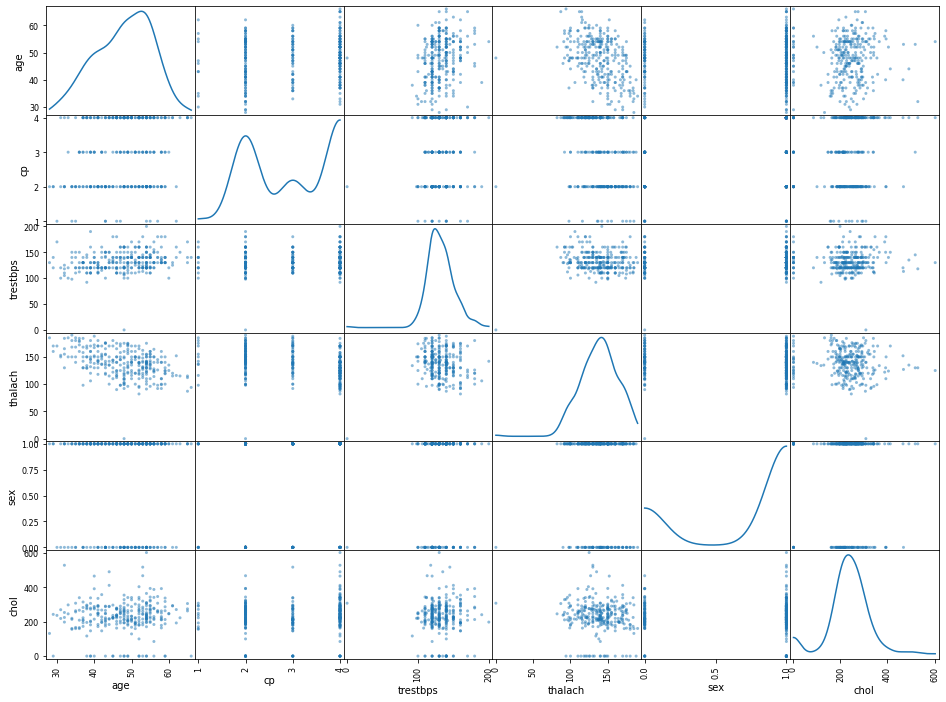

In [719]:
pd.plotting.scatter_matrix(data[['age', 'cp',  
                                   'trestbps', 'thalach','sex', 'chol' 
                                   ]].dropna(), figsize=(16, 12), diagonal='kde')
plt.show()

We can see:

-Young people has low cholesterol level than elderly people.

-Male person has very high cholesterol level between (400-600) according to women

-Max. heart rate achieved(thalach)getting less and less after the 55's ages.

-It can be seen asymptomatic chest pain (very high risk for heart attack) at all ages.


### Visualization

/home/criuser/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='fbs'>

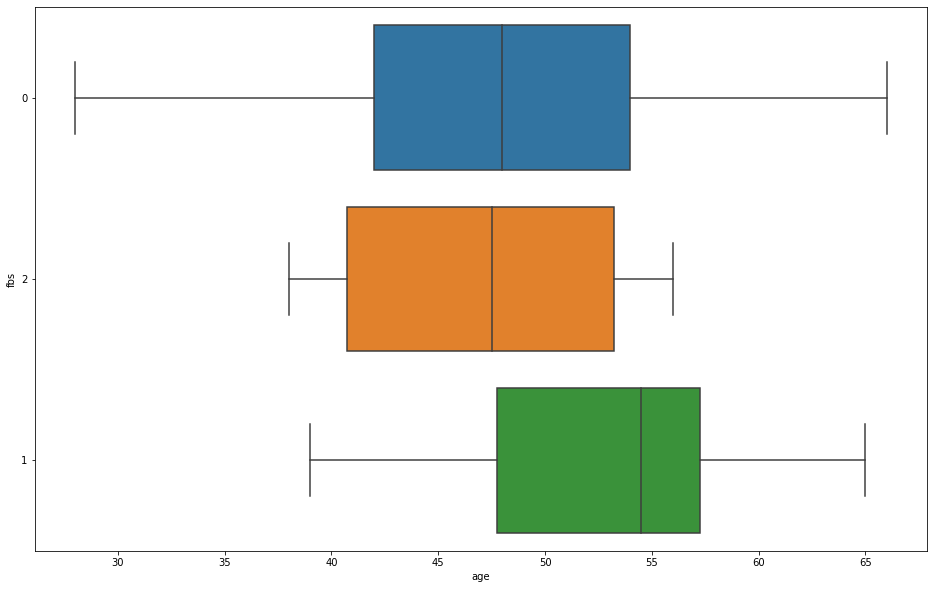

In [720]:
#Which age have the highest fbs type

plt.figure(figsize=(16, 10))
sns.boxplot(data["age"], data["fbs"])

/home/criuser/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='chol'>

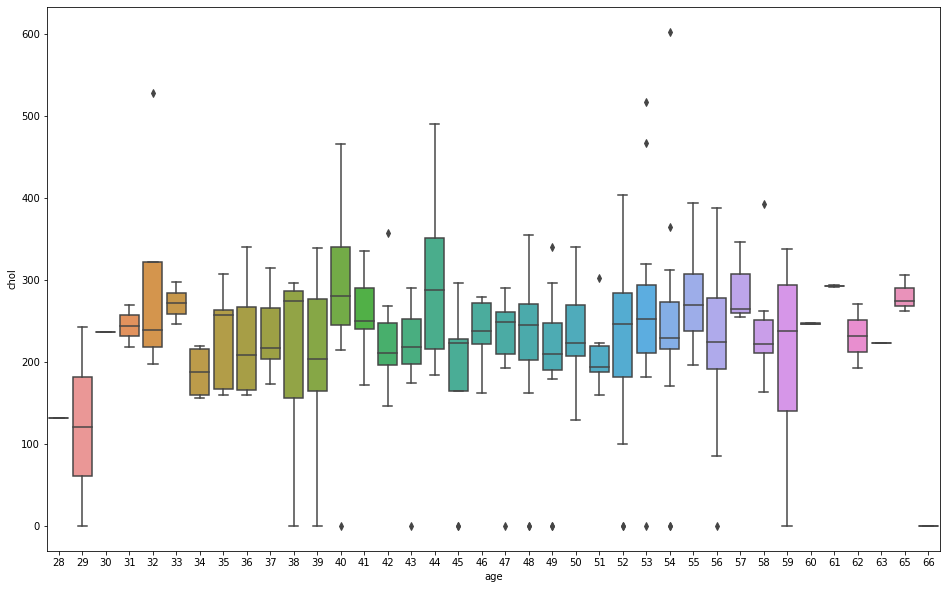

In [721]:
#Which age have the highest cholesterol

plt.figure(figsize=(16, 10))
sns.boxplot(data["age"], data["chol"])